<a href="https://colab.research.google.com/github/Gabriela2685/Simulacion1/blob/main/x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probabilidad teórica de interferencia: 0.6554217416103243
Probabilidad estimada de interferencia (media de 10000 simulaciones): 0.3442


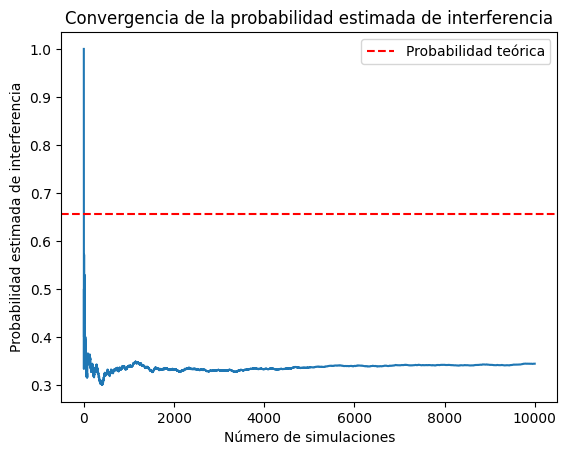

In [1]:
import random
import math
import matplotlib.pyplot as plt

# Función que determina si hay interferencia
def interferencia():
    x_1 = random.gauss(1.50, 0.04)  # Media = 1.50, Desviación estándar = 0.04
    x_2 = random.gauss(1.48, 0.03)  # Media = 1.48, Desviación estándar = 0.03
    if x_2 - x_1 > 0.0:
        return 1
    else:
        return 0

# Función para calcular la probabilidad estimada de interferencia
def prob_inter(n):
    prob = []
    inter = 0
    for i in range(n):
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

# Función para calcular la probabilidad teórica de interferencia
def prob_teorica():
    mu1 = 1.50
    mu2 = 1.48
    var1 = 0.0016
    var2 = 0.0009
    sigma = math.sqrt(var1 + var2)
    prob = 1 - 0.5 * (1 + math.erf((0 - (mu1 - mu2)) / (math.sqrt(2) * sigma)))
    return prob

# Realizar la simulación y obtener la probabilidad estimada
n_simulaciones = 10000
prob_estimada = prob_inter(n_simulaciones)

# Calcular la probabilidad teórica
prob_teorica_valor = prob_teorica()

# Imprimir la probabilidad teórica y la probabilidad estimada
print("Probabilidad teórica de interferencia:", prob_teorica_valor)
print("Probabilidad estimada de interferencia (media de", n_simulaciones, "simulaciones):", prob_estimada[-1])

# Graficar la convergencia de la probabilidad estimada
plt.plot(prob_estimada)
plt.axhline(y=prob_teorica_valor, color='r', linestyle='--', label='Probabilidad teórica')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad estimada de interferencia')
plt.title('Convergencia de la probabilidad estimada de interferencia')
plt.legend()
plt.show()
